<a href="https://colab.research.google.com/github/vlkumar-859/ml_spotifty/blob/main/Copy_of_ml_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing different libraries to handle the data set


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
spotify_data = pd.read_csv("/content/track_data.csv")
spotify_data

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity,artist_popularity,year,hit
0,0HEmnAUT8PHznIAAmVXqFJ,0.009400,0.887,193200,0.480,0.000036,11,0.0662,-11.994,1,0.1170,95.846,4,0.607,76,78.0,2016,1
1,6YnzBV7YkaXZNCK3tlnCfg,0.204000,0.776,243400,0.703,0.000000,0,0.3360,-10.696,1,0.0427,112.534,4,0.939,66,73.0,2016,1
2,0xPaZrF25ltzvz1a2Pm5DQ,0.420000,0.503,171827,0.465,0.000000,8,0.1010,-8.077,0,0.0274,141.796,4,0.143,64,91.0,2016,1
3,2R7858bg0GHuBBxjTyOL7N,0.232000,0.583,302600,0.545,0.000000,2,0.1330,-11.698,0,0.0351,153.250,4,0.800,64,78.0,2016,1
4,08WPvDEsHvTFuB9w8tC2OS,0.273000,0.781,193181,0.570,0.000000,11,0.1960,-5.874,0,0.1880,107.059,4,0.858,59,72.0,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,5TnLXSd4h6G06Fbt2ApOpa,0.089900,0.857,162400,0.583,0.000000,1,0.2040,-7.466,0,0.0860,132.010,4,0.443,72,95.0,2019,0
7312,748Vnqa1Rpwteiarxartiz,0.286000,0.895,211480,0.407,0.000002,6,0.1260,-11.807,1,0.0542,119.030,4,0.677,53,65.0,2019,0
7313,22GEETI4LXhhePCO71PyEv,0.000181,0.362,177048,0.915,0.000000,5,0.1660,-3.244,0,0.1810,162.226,4,0.603,60,73.0,2018,0
7314,07xpeB1txX9bPKTwkuflMg,0.036600,0.900,181422,0.610,0.000041,11,0.0979,-9.051,0,0.1140,127.149,4,0.673,56,47.0,2019,0


In the dataset , there is no use of id column , so it is better to remove that column as it doesn't make any sense to the dataset and on removing that column our dataset looks more clear.

let's see our dataset after removing id column

In [7]:
spotify_data.drop('id', inplace=True, axis=1)
spotify_data

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity,artist_popularity,year,hit
0,0.009400,0.887,193200,0.480,0.000036,11,0.0662,-11.994,1,0.1170,95.846,4,0.607,76,78.0,2016,1
1,0.204000,0.776,243400,0.703,0.000000,0,0.3360,-10.696,1,0.0427,112.534,4,0.939,66,73.0,2016,1
2,0.420000,0.503,171827,0.465,0.000000,8,0.1010,-8.077,0,0.0274,141.796,4,0.143,64,91.0,2016,1
3,0.232000,0.583,302600,0.545,0.000000,2,0.1330,-11.698,0,0.0351,153.250,4,0.800,64,78.0,2016,1
4,0.273000,0.781,193181,0.570,0.000000,11,0.1960,-5.874,0,0.1880,107.059,4,0.858,59,72.0,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,0.089900,0.857,162400,0.583,0.000000,1,0.2040,-7.466,0,0.0860,132.010,4,0.443,72,95.0,2019,0
7312,0.286000,0.895,211480,0.407,0.000002,6,0.1260,-11.807,1,0.0542,119.030,4,0.677,53,65.0,2019,0
7313,0.000181,0.362,177048,0.915,0.000000,5,0.1660,-3.244,0,0.1810,162.226,4,0.603,60,73.0,2018,0
7314,0.036600,0.900,181422,0.610,0.000041,11,0.0979,-9.051,0,0.1140,127.149,4,0.673,56,47.0,2019,0


data type of each column is ,


In [8]:
spotify_data.dtypes

acousticness         float64
danceability         float64
duration_ms            int64
energy               float64
instrumentalness     float64
key                    int64
liveness             float64
loudness             float64
mode                   int64
speechiness          float64
tempo                float64
time_signature         int64
valence              float64
track_popularity       int64
artist_popularity    float64
year                   int64
hit                    int64
dtype: object

first five rows of the dataset can be seen using ***head( )*** method

In [ ]:
spotify_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity,artist_popularity,year,hit
0,0.0094,0.887,193200,0.480,0.000036,11,0.0662,-11.994,1,0.1170,95.846,4,0.607,76,78.0,2016,1
1,0.2040,0.776,243400,0.703,0.000000,0,0.3360,-10.696,1,0.0427,112.534,4,0.939,66,73.0,2016,1
2,0.4200,0.503,171827,0.465,0.000000,8,0.1010,-8.077,0,0.0274,141.796,4,0.143,64,91.0,2016,1
3,0.2320,0.583,302600,0.545,0.000000,2,0.1330,-11.698,0,0.0351,153.250,4,0.800,64,78.0,2016,1
4,0.2730,0.781,193181,0.570,0.000000,11,0.1960,-5.874,0,0.1880,107.059,4,0.858,59,72.0,2016,1


in the same way , last five rows can be seen using ***tail( )*** method

In [9]:
spotify_data.tail()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity,artist_popularity,year,hit
7311,0.089900,0.857,162400,0.583,0.000000,1,0.2040,-7.466,0,0.0860,132.010,4,0.443,72,95.0,2019,0
7312,0.286000,0.895,211480,0.407,0.000002,6,0.1260,-11.807,1,0.0542,119.030,4,0.677,53,65.0,2019,0
7313,0.000181,0.362,177048,0.915,0.000000,5,0.1660,-3.244,0,0.1810,162.226,4,0.603,60,73.0,2018,0
7314,0.036600,0.900,181422,0.610,0.000041,11,0.0979,-9.051,0,0.1140,127.149,4,0.673,56,47.0,2019,0
7315,0.085800,0.736,150767,0.604,0.000000,10,0.4350,-7.769,0,0.2650,77.956,4,0.687,21,36.0,2019,0


number of rows and columns present in the dataset can be known with ***shape***

In [10]:
spotify_data.shape

(7316, 17)

let's start to know our dataset by knowing the columns present in it…

In [11]:
spotify_data.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'track_popularity',
       'artist_popularity', 'year', 'hit'],
      dtype='object')

information of columns/attributes in dataset 

In [12]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   acousticness       7316 non-null   float64
 1   danceability       7316 non-null   float64
 2   duration_ms        7316 non-null   int64  
 3   energy             7316 non-null   float64
 4   instrumentalness   7316 non-null   float64
 5   key                7316 non-null   int64  
 6   liveness           7316 non-null   float64
 7   loudness           7316 non-null   float64
 8   mode               7316 non-null   int64  
 9   speechiness        7316 non-null   float64
 10  tempo              7316 non-null   float64
 11  time_signature     7316 non-null   int64  
 12  valence            7316 non-null   float64
 13  track_popularity   7316 non-null   int64  
 14  artist_popularity  7316 non-null   float64
 15  year               7316 non-null   int64  
 16  hit                7316 

Summary of statistics on numerical data , can be obtained using ***describe( )*** method

In [13]:
spotify_data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity,artist_popularity,year,hit
count,7316.000000,7316.000000,7.316000e+03,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000
mean,0.307598,0.629965,2.085889e+05,0.580205,0.093891,5.183980,0.170513,-8.016135,0.604019,0.107349,120.267395,3.939995,0.448518,53.135046,69.869450,2018.200383,0.396118
std,0.319017,0.163005,5.485317e+04,0.228295,0.254230,3.610541,0.127278,4.972786,0.489094,0.109572,30.585949,0.357835,0.225768,23.268555,20.429041,0.930991,0.489123
min,0.000002,0.000000,1.146800e+04,0.001630,0.000000,0.000000,0.019700,-39.959000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000
25%,0.044100,0.518750,1.772270e+05,0.449000,0.000000,2.000000,0.097900,-8.980000,0.000000,0.038400,95.984500,4.000000,0.264000,40.000000,54.000000,2018.000000,0.000000
50%,0.175000,0.646000,2.036310e+05,0.613000,0.000002,5.000000,0.119000,-6.675500,1.000000,0.058300,119.796500,4.000000,0.433000,59.000000,75.000000,2018.000000,0.000000
75%,0.512000,0.751000,2.319070e+05,0.745000,0.001240,8.000000,0.196000,-5.077000,1.000000,0.128000,140.975000,4.000000,0.618000,71.000000,87.000000,2019.000000,1.000000
max,0.996000,0.981000,1.004627e+06,0.997000,0.977000,11.000000,0.988000,0.175000,1.000000,0.966000,212.117000,5.000000,0.982000,100.000000,100.000000,2019.000000,1.000000


it is very important to check the presence of null values in the dataset ,

In [14]:
spotify_data.isnull().sum()

acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
mode                 0
speechiness          0
tempo                0
time_signature       0
valence              0
track_popularity     0
artist_popularity    0
year                 0
hit                  0
dtype: int64

 from the above output it is clear that there are no null values present in the dataset , but if there are any null values present in the dataset then first we have to handle those null values and then proceed to further EDA .

the relation between the columns in the dataset can be known by the correlation ,

In [15]:
corr = spotify_data.corr()
corr

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity,artist_popularity,year,hit
acousticness,1.000000,-0.348729,0.031851,-0.741738,0.448284,0.003328,-0.146108,-0.678751,0.038022,-0.174548,-0.170832,-0.183673,-0.257062,-0.015654,-0.194454,-0.050053,-0.217281
danceability,-0.348729,1.000000,-0.180647,0.244013,-0.342786,0.006174,-0.026859,0.367401,-0.084362,0.287548,-0.005573,0.182378,0.396193,0.128355,0.310643,0.043101,0.278788
duration_ms,0.031851,-0.180647,1.000000,-0.010186,-0.000416,-0.000423,0.024249,0.016188,0.029001,-0.109887,-0.011250,-0.021636,-0.148478,-0.055342,-0.054552,-0.094674,-0.036604
energy,-0.741738,0.244013,-0.010186,1.000000,-0.457396,0.008901,0.192097,0.808419,-0.052688,0.112024,0.181401,0.183950,0.423511,0.006957,0.134145,0.081438,0.188716
instrumentalness,0.448284,-0.342786,-0.000416,-0.457396,1.000000,-0.019138,-0.084331,-0.691304,-0.015184,-0.179040,-0.085750,-0.140441,-0.257592,-0.037117,-0.295909,0.039293,-0.268660
key,0.003328,0.006174,-0.000423,0.008901,-0.019138,1.000000,0.004873,0.003207,-0.149255,0.012019,-0.009733,0.012038,0.043913,0.023138,0.019457,0.020062,0.014772
liveness,-0.146108,-0.026859,0.024249,0.192097,-0.084331,0.004873,1.000000,0.137881,0.010411,0.068491,0.024313,0.017484,0.054747,-0.019958,-0.001207,-0.000112,0.025630
loudness,-0.678751,0.367401,0.016188,0.808419,-0.691304,0.003207,0.137881,1.000000,-0.021354,0.114551,0.143503,0.191849,0.356830,0.040815,0.268365,0.022986,0.274264
mode,0.038022,-0.084362,0.029001,-0.052688,-0.015184,-0.149255,0.010411,-0.021354,1.000000,-0.073782,0.006590,-0.018618,-0.047143,-0.023181,-0.029098,-0.028669,-0.047685
speechiness,-0.174548,0.287548,-0.109887,0.112024,-0.179040,0.012019,0.068491,0.114551,-0.073782,1.000000,0.148885,0.095589,0.089592,0.084188,0.222824,0.024348,0.177512


Visualising the correlation with heatmap

<Figure size 1152x432 with 0 Axes>

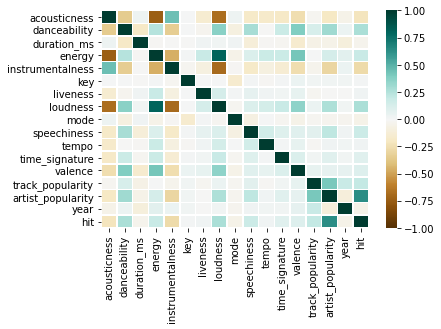

<Figure size 1152x432 with 0 Axes>

In [ ]:
heatmap=sns.heatmap(corr,vmax=1, vmin=-1,linewidth=.5,cmap="BrBG")
plt.figure(figsize=(16, 6))

from the above heat map we can draw some relations between the columns , which are discussed in the coming section

so far on observing the dataset , some simple questions that will come into everyone's mind are discussed below :

How many sings are released in every year ?

Text(0, 0.5, 'NUMBER OF SONGS')

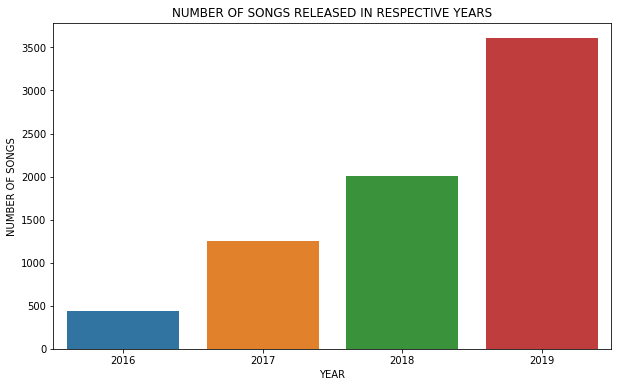

In [16]:
x=spotify_data.year.value_counts()
l=[]
for y in x[::-1]:
  l.append(y)
plt.figure(figsize=(10,6))

plt.title("NUMBER OF SONGS RELEASED IN RESPECTIVE YEARS")

sns.barplot(x=[2016,2017,2018,2019], y=l)

plt.xlabel("YEAR")

plt.ylabel("NUMBER OF SONGS")

from the above plot we can conclude that , as time going , number of songs releasing are also increasing . number of songs released in 2019 are almost 7 times the number of sings released in 2016

How many songs are hit in the respective years?

Text(0, 0.5, 'NUMBER OF HIT SONGS')

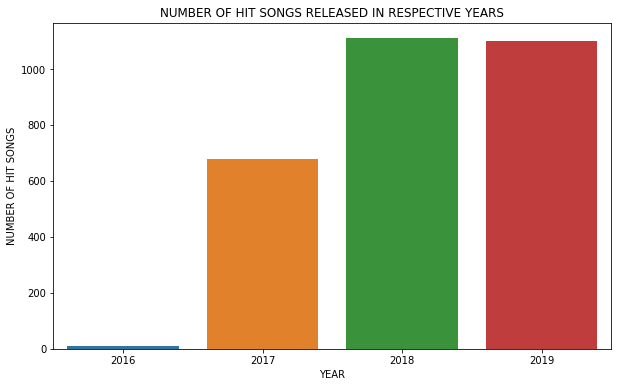

In [ ]:
hit=[0,0,0,0]
for i in range(7316):
  if spotify_data.iloc[i]['hit']:
    x=spotify_data.iloc[i]['year']
    if x==2016:
      hit[0]+=1
    elif x==2017:
      hit[1]+=1
    elif x==2018:
      hit[2]+=1
    else:
      hit[3]+=1

plt.figure(figsize=(10,6))

plt.title("NUMBER OF HIT SONGS RELEASED IN RESPECTIVE YEARS")

sns.barplot(x=[2016,2017,2018,2019], y=hit)

plt.xlabel("YEAR")

plt.ylabel("NUMBER OF HIT SONGS")

it is observed that initially almost there are no hit songs , but from 2017 that count increased drastically.

from the above two observations , another possible observation is comparison between released songs and hit songs out of those songs released songs

What is the average duration of songs?

Text(0, 0.5, 'NUMBER OF SONGS')

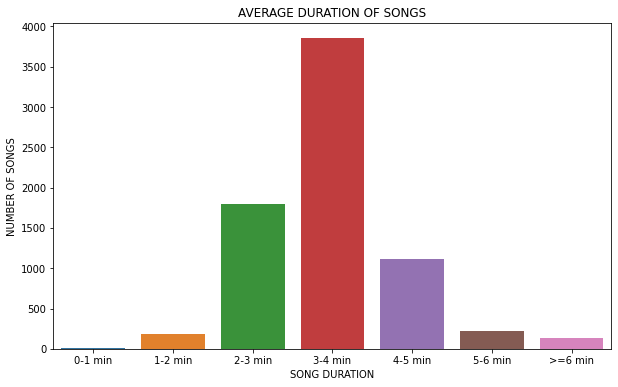

In [18]:
t=["0-1 min","1-2 min","2-3 min","3-4 min","4-5 min","5-6 min",">=6 min"]
dur=[0]*7
for x in spotify_data.duration_ms:
  len = x//1000
  len = len//60
  if len>=6:
    dur[6]=dur[6]+1
  else:
    dur[len]=dur[len]+1
plt.figure(figsize=(10,6))

plt.title("AVERAGE DURATION OF SONGS")

sns.barplot(x=t, y=dur)

plt.xlabel("SONG DURATION")

plt.ylabel("NUMBER OF SONGS")

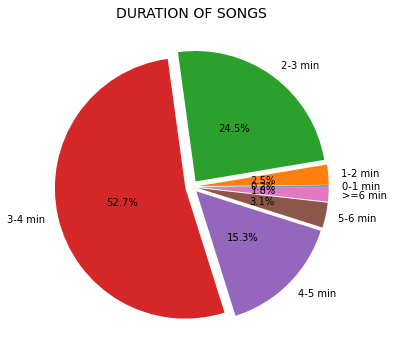

In [19]:
pie, ax = plt.subplots(figsize=[10,6])
labels = t
plt.pie(dur,autopct="%.1f%%",explode=[0.05]*7,labels=t,pctdistance=0.5)
plt.title("DURATION OF SONGS", fontsize=14);

from the plots it is observed that , 50 percent of songs are having 3 to 4 minutes of duration and around 90% of songs duration lies between 2 to 5 minutes.

From above plots , it is observed that most songs are around 3 minutes

What is the average duration of hit songs?


Text(0, 0.5, 'NUMBER OF SONGS')

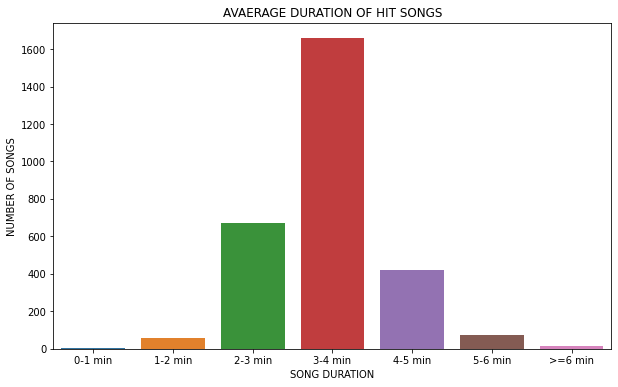

In [21]:
t_hit=["0-1 min","1-2 min","2-3 min","3-4 min","4-5 min","5-6 min",">=6 min"]
dur_hit=[0]*7
for i in range(7316):
  if spotify_data.iloc[i]['hit']:
    len = spotify_data.iloc[i]['duration_ms']//1000
    len = len//60
    if len>=6:
      dur_hit[6]=dur_hit[6]+1
    else:
      dur_hit[int(len)]=dur_hit[int(len)]+1
plt.figure(figsize=(10,6))

plt.title("AVAERAGE DURATION OF HIT SONGS")

sns.barplot(x=t_hit, y=dur_hit)

plt.xlabel("SONG DURATION")

plt.ylabel("NUMBER OF SONGS")

<Figure size 720x432 with 0 Axes>

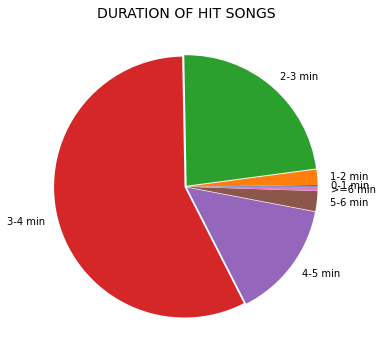

In [22]:
plt.figure(figsize=(10,6))
pie, ax = plt.subplots(figsize=[10,6])
labels = t_hit
plt.pie(dur_hit,explode=[0.01]*7,labels=t_hit,pctdistance=0.05)
plt.title("DURATION OF HIT SONGS", fontsize=14);

From the above plots we can conclude that hit songs are also having average time around 3 minutes

How many accoustic songs are hit?


Text(0, 0.5, 'NUMBER OF HIT ACOUSTIC SONGS')

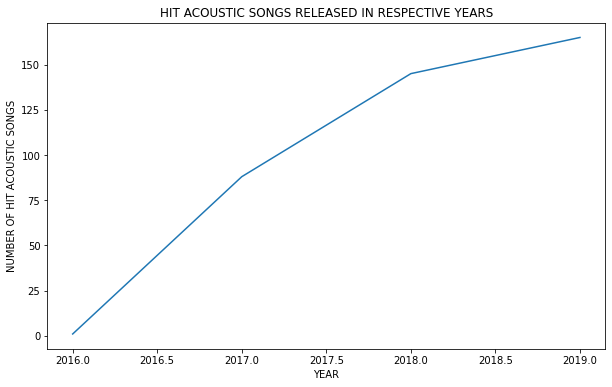

In [ ]:
hit=[0,0,0,0]
for i in range(7316):
  if spotify_data.iloc[i]['hit'] and spotify_data.iloc[i]['acousticness']>0.5:
  #if spotify_data.iloc[i]['acousticness']>0.5:
    x=spotify_data.iloc[i]['year']
    if x==2016:
      hit[0]+=1
    elif x==2017:
      hit[1]+=1
    elif x==2018:
      hit[2]+=1
    else:
      hit[3]+=1
    
plt.figure(figsize=(10,6))

plt.title("HIT ACOUSTIC SONGS RELEASED IN RESPECTIVE YEARS")

sns.lineplot(x=[2016,2017,2018,2019], y=hit)

plt.xlabel("YEAR")

plt.ylabel("NUMBER OF HIT ACOUSTIC SONGS")


as time goes on acousticness in hit songs increased , but they didn't changed much . Even in 2019 , the count is just above 150 only .

how acousticness influences the energy of the song?

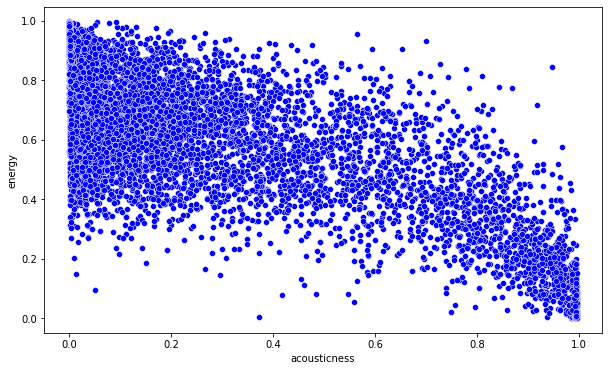

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(x=spotify_data.acousticness,y=spotify_data.energy, color="b")

it shows that , they are oppositely related and as acousticness increases energy of the song decreases.

Is there relation any between artist popularity and song becoming a hit?

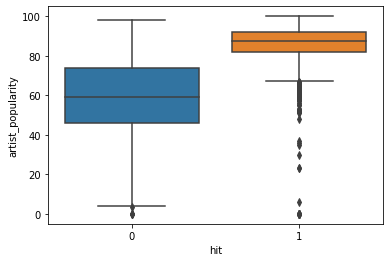

In [5]:
ax=sns.boxplot(x="hit",y="artist_popularity",data=spotify_data)

in the plot '0' indicates , song is not a hit and '1' indicates , song is a hit. So , from the figure it is obvious that songs which are having artist popularity greater than 80 are mostly hits , while the songs below 80 are not becoming hits. Also we can find some outliers in hits , where artist popularity is less than 80 and those points are negligible.

Relation between artist popularity vs track popularity

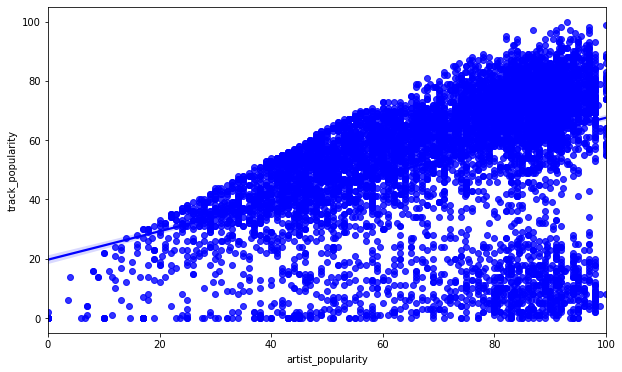

In [23]:
plt.figure(figsize=(10,6))

sns.regplot(x=spotify_data.artist_popularity,y=spotify_data.track_popularity, color="b") 


From this we can say that mostly they are positively related

These are some of the basic insights we had made from this dataset , a lot more insights can be made from the same dataset. We had made some simple conclusions based on these simple plots , there are many other plots that can be used to understand and make more useful insights.